<a href="https://colab.research.google.com/github/shu736/Introduction-to-Pythom/blob/main/Python_Day_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INTODUCTION TO MACHINE LEARNING
FIRST ALGORITHM: SIMPLE LINEAR REGRESSION

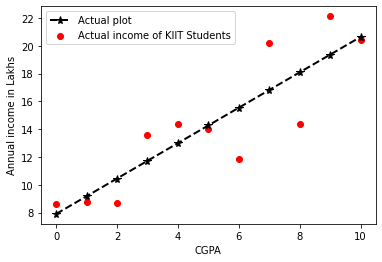

The hyper plane obtained by regression is: 7.901351448835658 + 1.2730158635529087 x
The predicted income in (Lakhs) for a student having CGPA of 6.5: 16.175954561929565


In [6]:
import numpy as np
import matplotlib.pyplot as plt
n = 11 #11 samples are taken
x = np.linspace(0,10,n)   #take n no of points for CGPA axis creation
y = 1.5*x+2+8*np.random.rand(n)   # Annual income in lakhs
b1 = (n*np.matmul(x,y.T)-np.sum(x)*np.sum(y))/((n*np.matmul(x,x.T))-(np.sum(x))**2)  #This is the value of b1
b0 = (np.sum(y)-b1*np.sum(x))/n   #this is the value of b0
y_pred = b0+b1*x 
plt.scatter(x,y,c = "red",label = "Actual income of KIIT Students")  #this creates a red colored scatter plot
plt.plot(x,y_pred,c = "black",linestyle = '--',linewidth = 2, marker = '*', markersize = 8,label = "Actual plot") #This creates a line plot
plt.xlabel("CGPA") #This creates a x-label
plt.ylabel("Annual income in Lakhs") #This creates a y-label
plt.legend()
plt.show()

print("The hyper plane obtained by regression is:", b0,"+",b1,"x")  #Hyper plane equation
print("The predicted income in (Lakhs) for a student having CGPA of 6.5:", b0+b1*6.5)  #Predicted  value

In [8]:
def cal_err(b,x,y):
  n = len(y)
  X = np.insert(x,0,np.ones(n),axis = 1) #Inserting a column of ones to the existing matrix x
  return np.sum((y-np.matmul(b,X.T))**2)*(0.5/n)

def grad(b,x,y):
  n = len(y) #This gives me the number of samples 
  X = np.insert(x,0,np.ones(n),axis = 1) #Inserting a column of ones to the existing matrix x
  g = np.array([0]*len(b)) #gradients are zeros
  for i in range(len(b)):
    g[i] = (-1/n)*np.sum((y-np.matmul(b,X.T))*X.T[i,:]) #calculate gradients
  return g

def update_weights(b,eta,x,y):
  return b - eta*grad(b,x,y) #grad function returns the gradients and I am returning the updated weights

def grad_algo(x,y,eta,max_iter):
  #x is the input data
  #y is the output data
  #eta is learning rate 
  #max_iter is the maximem iterations
  num_rows, n = x.shape #n is the number of features or the number of variables in the dataset
  b = np.zeros(n+1) #initialize the betas to zeros
  error = [cal_err(b,x,y)] #This function calculates the error
  iter = 1 #This indicates the current iteration
  while iter < max_iter:
    b = update_weights(b,eta,x,y) #This function updates the weghts in every iteration
    error.append(cal_err(b,x,y)) #Update error for the updated weights and store in the list
    iter = iter+1
  plt.scatter(np.arange(1,len(error)+1,1),np.array(error)) #plots error vs iterations
  plt.xlabel("Iterations")
  plt.ylabel("Error")
  plt.show()
  return b

def predict(b,x):
  return b[0]+np.sum(b[1:]*x) #b0+b1*x1+b2*x2+...+bn*nx

x1 = np.array([x]) #I am doing this to convert x into a 2D-array

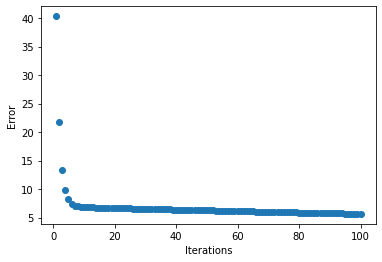

The hyper plane obtained by regression is: 1.1900000000000008 + 1.2600000000000002 x
The predicted income (Lakhs) for a student having CGPA of 6.5: 9.380000000000003


In [ ]:
b = grad_algo(x1.T,y,0.01,100)
print("The hyper plane obtained by regression is:", b[0],"+",b[1],"x") #Hyper plane equation
print("The predicted income (Lakhs) for a student having CGPA of 6.5:", predict(b,6.5)) #Predicted value

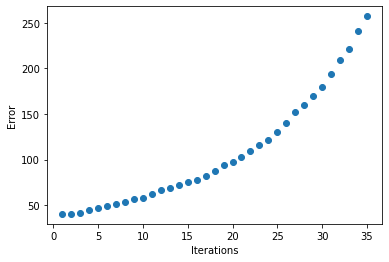

The hyper plane obtained by regression is: 1.8600000000000003 + -2.76 x
The predicted income (Lakhs) for a student having CGPA of 6.5: -16.08


In [ ]:
b = grad_algo(x1.T,y,0.06,35) #increase the learning rate
print("The hyper plane obtained by regression is:", b[0],"+",b[1],"x") #Hyper plane equation
print("The predicted income (Lakhs) for a student having CGPA of 6.5:", predict(b,6.5)) #Predicted value